# Simulation exercise: part 2
This is just some additional coding for the simulation exercise that I went through in [part 1](simulation_part_1.ipynb). I went through the steps in that part, and thought that it would be good to clean the code, and extract some of the functionality to functions so that the parameters of the game simluation could be easily altered. This should also make the code easier to follow and read.

### Rolling the die  
I suppose the first thing that stands out is creating a function for the rolling of a standard 6-sided die. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

def roll_die():
    """ Simulate the rolling of a 6-sided die """
    return np.random.randint(1,7)

# Quick check to make sure it is working 
rolls = []
for i in range(20):
    rolls.append(roll_die())
    
print(rolls)

[1, 1, 4, 1, 3, 5, 3, 6, 3, 3, 3, 2, 1, 1, 5, 4, 5, 3, 1, 4]


What else could be extracted to a function? What are the main features of the game?  
- A player rolls a 6-sided die
- A player updates their position
- A player continues for **n** number of rolls 
<br>

That seems likes a good starting point for now at least. 

### Updating the player's position

In [2]:
def update_position(start_position, roll):
    """ Update the player's position based on current position and die roll """
    if roll < 3:
        return max(0, start_position - 1)
    elif roll < 6:
        return start_position + 1
    else:
        return start_position + roll_die()
    
# Check some scenarios
print(update_position(10, 1))
print(update_position(10, 5))
print(update_position(10, 6))

9
11
12


We can see that the scenarios appear to be working as intended. We can assume that the second roll when the 6 was scored was a 2.  
We are starting to see the game come together, but we really need a function that simulates the game being played itself. 

### Successive rolls

In [3]:
def simulate_playthrough(n_rolls = 25):
    """ Simulate the playing of a single game with n rolls """
    # Initiate a list with starting position of 0
    steps = [0] 
    for go in range(n_rolls):
        steps.append(update_position(steps[-1], roll_die()))
    return steps

# Let's try it out
print(simulate_playthrough())

[0, 3, 4, 5, 6, 5, 11, 12, 13, 14, 15, 16, 17, 16, 15, 19, 18, 19, 18, 17, 18, 19, 23, 22, 21, 20]


We now have a way to play a game, track it and get a list of all the steps as the result. What about the multiple games, or the plotting?  
### Simulating multiple games  
It wouldn't be necessary to have a completely different function for simulating multiple games. I think that we can just alter the existing `simulate_playthrough` function to take an additional argument that could specify the number of games that you want to simulate. 

In [4]:
def simulate_playthrough(n_rolls = 25, n_games = 1):
    """ Simulate the playing of a single game with n rolls """
    # Initiate a list with starting position of 0
    games = [] 
    for game in range(n_games):
        steps = [0]
        for go in range(n_rolls):
            steps.append(update_position(steps[-1], roll_die()))
        games.append(steps)
    return games

ten_games = simulate_playthrough(n_games = 10)
print(ten_games)

[[0, 5, 6, 5, 4, 5, 8, 7, 6, 9, 8, 13, 14, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26], [0, 1, 0, 0, 1, 2, 3, 6, 7, 8, 9, 14, 13, 14, 15, 14, 15, 16, 17, 22, 23, 24, 25, 27, 26, 25], [0, 2, 5, 6, 7, 8, 9, 8, 9, 10, 9, 8, 14, 13, 17, 16, 17, 18, 23, 24, 25, 26, 27, 26, 25, 24], [0, 1, 4, 9, 10, 12, 11, 10, 9, 10, 11, 10, 14, 15, 16, 17, 22, 21, 22, 21, 22, 21, 20, 23, 24, 25], [0, 1, 2, 1, 2, 1, 4, 5, 6, 7, 11, 12, 15, 14, 15, 17, 19, 20, 21, 22, 23, 28, 29, 28, 29, 28], [0, 1, 4, 6, 5, 6, 11, 10, 11, 12, 13, 14, 15, 16, 15, 17, 18, 19, 20, 19, 18, 21, 20, 19, 18, 17], [0, 3, 4, 5, 4, 9, 13, 14, 13, 14, 15, 14, 19, 20, 21, 22, 28, 29, 30, 31, 32, 33, 34, 33, 32, 31], [0, 6, 7, 8, 7, 8, 7, 9, 10, 11, 12, 13, 14, 13, 14, 13, 14, 15, 14, 13, 14, 15, 16, 17, 18, 19], [0, 1, 2, 3, 4, 5, 6, 8, 7, 6, 7, 8, 7, 6, 5, 11, 10, 9, 10, 9, 10, 15, 14, 20, 21, 22], [0, 1, 4, 5, 6, 5, 4, 5, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 6, 7, 8, 13, 17, 16, 17, 18]]


### Analysing the scores
We have successfully simulated 10 games of 25 rolls each, and stored those results in a list of lists. 

In [5]:
# Find out the ending point of each game
final_scores = [list[-1] for list in ten_games]
print(final_scores)

[26, 25, 24, 25, 28, 17, 31, 19, 22, 18]


In [6]:
# Find out the highest score present in each game
max_scores = [max(list) for list in ten_games]
print(max_scores)

[26, 27, 27, 25, 29, 21, 34, 19, 22, 18]


In [7]:
high_point = list(map(np.argmax, ten_games))
print(high_point)

[25, 23, 22, 25, 22, 21, 22, 25, 25, 25]


The `high_point` list above shows the index of the highest point (score) that the player got to throughout the game. You'll note that the list length is one greater than the number of rows because I initalised them with a 0 to act as the start position.  
We can tell by looking at this list that half of the games (1st, 4th, 8th, 9th, 10th) reached their peak on the last roll of the game. 

In [8]:
# View the progress of all ten games in a data frame
import pandas as pd 
df = pd.DataFrame(np.array(ten_games).transpose(), columns = range(1,11))
print(df)

    1   2   3   4   5   6   7   8   9   10
0    0   0   0   0   0   0   0   0   0   0
1    5   1   2   1   1   1   3   6   1   1
2    6   0   5   4   2   4   4   7   2   4
3    5   0   6   9   1   6   5   8   3   5
4    4   1   7  10   2   5   4   7   4   6
5    5   2   8  12   1   6   9   8   5   5
6    8   3   9  11   4  11  13   7   6   4
7    7   6   8  10   5  10  14   9   8   5
8    6   7   9   9   6  11  13  10   7   4
9    9   8  10  10   7  12  14  11   6   3
10   8   9   9  11  11  13  15  12   7   4
11  13  14   8  10  12  14  14  13   8   5
12  14  13  14  14  15  15  19  14   7   4
13  13  14  13  15  14  16  20  13   6   5
14  14  15  17  16  15  15  21  14   5   4
15  15  14  16  17  17  17  22  13  11   5
16  16  15  17  22  19  18  28  14  10   4
17  17  16  18  21  20  19  29  15   9   5
18  19  17  23  22  21  20  30  14  10   6
19  20  22  24  21  22  19  31  13   9   7
20  21  23  25  22  23  18  32  14  10   8
21  22  24  26  21  28  21  33  15  15  13
22  23  25 

In [9]:
def results_summary(results):
    """ Produce some statistics about the simulated games """
    final_scores = [list[-1] for list in results]
    highest_score = max(final_scores)
    lowest_score = min(final_scores)
    average_score = float("{0:.2f}".format(np.mean(final_scores))) 
    # I would normally return as tuple, but favoured dictionary here for keys
    return {'max' : highest_score, 'min' : lowest_score, 'mean' : average_score}

print(results_summary(ten_games))

{'max': 31, 'min': 17, 'mean': 23.5}


In [10]:
# Showing the results in a data frame 
pd.DataFrame({'summary' : pd.Series(results_summary(ten_games))})

,summary
max,31.0
mean,23.5
min,17.0


In [11]:
# We can display the summary results in a data frame like this as well
df_summary = pd.DataFrame([results_summary(ten_games)]); df_summary

,max,mean,min
0,31,23.5,17


### Plotting the results 


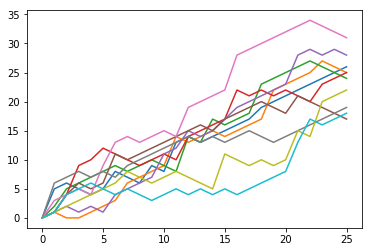

In [12]:
plt.plot(np.array(ten_games).transpose())
plt.show()

If we want to generate a graph of the results, like we did before, then we can create a function that does that for us. All we have to do is enter the results that are generated from our previous function and it will produce a graph showing the progress of all the games that we simulated, along with dynamic titles. 

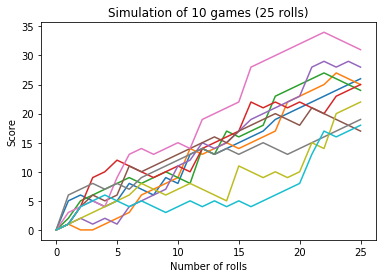

In [13]:
def plot_results(results):
    """ Plot a list of lists of results using matplotlib """
    transformed_results = np.array(results).transpose()
    plt.plot(transformed_results)
    plt.title('Simulation of ' + str(len(results)) + 
              ' games (' + str(len(results[0]) - 1) + ' rolls)')
    plt.xlabel('Number of rolls')
    plt.ylabel('Score')
    plt.show()
    
plot_results(ten_games)

### Conclusion
I have created a number of functions that all represent some part of what we did previously in the first part. This means that we are able to call an entire simluation in much less code. Hopefully you will agree that it is also easier to follow what is going on as part of the game. 

{'max': 58, 'min': 23, 'mean': 36.2}


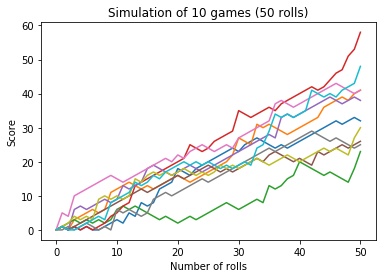

In [14]:
conc = simulate_playthrough(n_rolls = 50, n_games = 10)
print(results_summary(conc))
plot_results(conc)